In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

mainpath = "C:/Users/guill/Documents/Universidad/CovidData/CovidSpainData"
FileName = "serie_historica_acumulados.csv"

def getPath(mainpath,filename):
    return os.path.join(mainpath, filename)

def dropRow(df,index):
    return df.drop(df.index[index])

def casos(df):
    return df["Casos "].tolist()

def concatDF(df1,df2):
    return  pd.concat([df1,df2],axis = 1, ignore_index = True, sort = True)

def get_nuevosCasos(casosTotales) :
    nuevosCasos = np.array([],dtype=int)
    casos = 0
    for elem in casosTotales:
            casos = elem - casos
            nuevosCasos = np.append(nuevosCasos,casos)
            casos = elem
    return nuevosCasos

def get_porcentaje(casosTotales):
    porcentaje = np.array([],dtype = float)
    casos = 0
    for elem in casosTotales:
        if(casos != 0):
            pct = (elem-casos)/casos*100
        else:
            pct = casos
        porcentaje = np.append(porcentaje,pct)
        casos = elem
    return porcentaje

def get_historico(casosTotales,nuevosCasos,porcentaje):
    df1 = pd.DataFrame(casosTotales)
    df2 = pd.DataFrame(nuevosCasos)
    df3 = pd.DataFrame(porcentaje)
    historico = concatDF(df1,concatDF(df2,df3))
    historico.columns = ['Casos Totales','Casos diarios','porcentaje']
    return historico

pd.options.display.max_rows = None

In [32]:
world = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", encoding= 'unicode_escape')

In [39]:
world

dateRep  day  month  year  \
countriesAndTerritories                                                    
Afghanistan                                 28/03/2020   28      3  2020   
Afghanistan                                 27/03/2020   27      3  2020   
Afghanistan                                 26/03/2020   26      3  2020   
Afghanistan                                 25/03/2020   25      3  2020   
Afghanistan                                 24/03/2020   24      3  2020   
Afghanistan                                 23/03/2020   23      3  2020   
Afghanistan                                 22/03/2020   22      3  2020   
Afghanistan                                 21/03/2020   21      3  2020   
Afghanistan                                 20/03/2020   20      3  2020   
Afghanistan                                 19/03/2020   19      3  2020   
Afghanistan                                 18/03/2020   18      3  2020   
Afghanistan                                 17/03/2020   17      3  2020   
Afghanistan                                 16/03/2020   16      3  2020   
Afghanistan                                 15/03/2020   15      3  2020   
Afghanistan                                 11/03/2020   11      3  2020   
Afghanistan                                 08/03/2020    8      3  2020   
Afghanistan                                 02/03/2020    2      3  2020   
Afghanistan                                 01/03/2020    1      3  2020   
Afghanistan                                 29/02/2020   29      2  2020   
Afghanistan                                 28/02/2020   28      2  2020   
Afghanistan                                 27/02/2020   27      2  2020   
Afghanistan                                 26/02/2020   26      2  2020   
Afghanistan                                 25/02/2020   25      2  2020   
Afghanistan                                 24/02/2020   24      2  2020   
Afghanistan                                 23/02/2020   23      2  2020   
Afghanistan                                 22/02/2020   22      2  2020   
Afghanistan                                 21/02/2020   21      2  2020   
Afghanistan                                 20/02/2020   20      2  2020   
Afghanistan                                 19/02/2020   19      2  2020   
Afghanistan                                 18/02/2020   18      2  2020   
Afghanistan                                 17/02/2020   17      2  2020   
Afghanistan                                 16/02/2020   16      2  2020   
Afghanistan                                 15/02/2020   15      2  2020   
Afghanistan                                 14/02/2020   14      2  2020   
Afghanistan                                 13/02/2020   13      2  2020   
Afghanistan                                 12/02/2020   12      2  2020   
Afghanistan                                 11/02/2020   11      2  2020   
Afghanistan                                 10/02/2020   10      2  2020   
Afghanistan                                 09/02/2020    9      2  2020   
Afghanistan                                 08/02/2020    8      2  2020   
Afghanistan                                 07/02/2020    7      2  2020   
Afghanistan                                 06/02/2020    6      2  2020   
Afghanistan                                 05/02/2020    5      2  2020   
Afghanistan                                 04/02/2020    4      2  2020   
Afghanistan                                 03/02/2020    3      2  2020   
Afghanistan                                 02/02/2020    2      2  2020   
Afghanistan                                 01/02/2020    1      2  2020   
Afghanistan                                 31/01/2020   31      1  2020   
Afghanistan                                 30/01/2020   30      1  2020   
Afghanistan                                 29/01/2020   29      1  2020   
Afghanistan                                 28/01/2020   28      1  2020   
Afghanistan        

In [38]:
world = world.set_index("countriesAndTerritories")

In [63]:
italy = world.loc['Italy'].copy()
italyCases = np.array(italy["cases"])
italyCases = np.sort(italyCases)

spain = world.loc['Spain'].copy()
spainCases = np.array(spain["cases"])
spainCases = np.sort(spainCases)

usa = world.loc['United_States_of_America'].copy()
usaCases = np.array(usa["cases"])
usaCases = np.sort(usaCases)

df1 = pd.DataFrame(italyCases)
df2 = pd.DataFrame(spainCases)
df3 = pd.DataFrame(usaCases)

comparativa = concatDF(df1,(concatDF(df2,df3)))
comparativa.columns = ['Italy', 'Spain', 'USA']

ItalySpain = concatDF(df1,df2)
ItalySpain.columns = ['Italy', 'Spain']


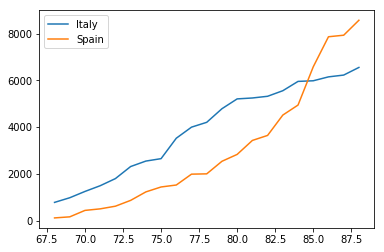

In [62]:
ItalySpain.tail(21).plot()

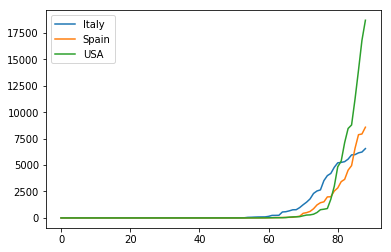

In [57]:
comparativa.plot()

In [2]:
CovidData = pd.read_csv(getPath(mainpath,FileName), encoding= 'unicode_escape')
CovidData = CovidData.fillna(0)
CovidData = CovidData.set_index("CCAA Codigo ISO")

In [3]:
andalucia = CovidData.loc['AN'].copy()
aragon = CovidData.loc['AR'].copy()
asturias = CovidData.loc['AS'].copy()
canarias = CovidData.loc['CN'].copy()
cantabira = CovidData.loc['CB'].copy()
castillaMancha = CovidData.loc['CM'].copy()
castillaLeon = CovidData.loc['CL'].copy()
cataluna = CovidData.loc['CT'].copy()
extremadura = CovidData.loc['EX'].copy()
galicia = CovidData.loc['GA'].copy()
baleares = CovidData.loc['IB'].copy()
rioja = CovidData.loc['RI'].copy()
madrid = CovidData.loc['MD'].copy()
murcia = CovidData.loc['MC'].copy()
navarra = CovidData.loc['NC'].copy()
paisVasco = CovidData.loc['PV'].copy()
valencia = CovidData.loc['VC'].copy()
ceuta = CovidData.loc['CE'].copy()
melilla = CovidData.loc['ME'].copy()

In [4]:
anCasos = np.array(andalucia["Casos "], dtype = int)
annew = get_nuevosCasos(anCasos)
anpct = get_porcentaje(anCasos)
anhistorico = get_historico(anCasos,annew,anpct)

arCasos = np.array(aragon["Casos "], dtype = int)
arnew = get_nuevosCasos(arCasos)
arpct = get_porcentaje(arCasos)
arhistorico = get_historico(arCasos,arnew,arpct)

asCasos = np.array(asturias["Casos "], dtype = int)
asnew = get_nuevosCasos(asCasos)
aspct = get_porcentaje(asCasos)
ashistorico = get_historico(asCasos,asnew,aspct)

cnCasos = np.array(canarias["Casos "], dtype = int)
cnnew = get_nuevosCasos(cnCasos)
cnpct = get_porcentaje(cnCasos)
cnhistorico = get_historico(cnCasos,cnnew,cnpct)

cbCasos = np.array(cantabira["Casos "], dtype = int)
cbnew = get_nuevosCasos(cbCasos)
cbpct = get_porcentaje(cbCasos)
cbhistorico = get_historico(cbCasos,cbnew,cbpct)

cmCasos = np.array(castillaMancha["Casos "], dtype = int)
cmnew = get_nuevosCasos(cmCasos)
cmpct = get_porcentaje(cmCasos)
cmhistorico = get_historico(cmCasos,cmnew,cmpct)

clCasos = np.array(castillaLeon["Casos "], dtype = int)
clnew = get_nuevosCasos(clCasos)
clpct = get_porcentaje(clCasos)
clhistorico = get_historico(clCasos,clnew,clpct)

ctCasos = np.array(cataluna["Casos "], dtype = int)
ctnew = get_nuevosCasos(ctCasos)
ctpct = get_porcentaje(ctCasos)
cthistorico = get_historico(ctCasos,ctnew,ctpct)

exCasos = np.array(extremadura["Casos "], dtype = int)
exnew = get_nuevosCasos(exCasos)
expct = get_porcentaje(exCasos)
exhistorico = get_historico(exCasos,exnew,expct)

gaCasos = np.array(galicia["Casos "], dtype = int)
ganew = get_nuevosCasos(gaCasos)
gapct = get_porcentaje(gaCasos)
gahistorico = get_historico(gaCasos,ganew,gapct)

ibCasos = np.array(baleares["Casos "], dtype = int)
ibnew = get_nuevosCasos(ibCasos)
ibpct = get_porcentaje(ibCasos)
ibhistorico = get_historico(ibCasos,ibnew,ibpct)

riCasos = np.array(rioja["Casos "], dtype = int)
rinew = get_nuevosCasos(riCasos)
ripct = get_porcentaje(riCasos)
rihistorico = get_historico(riCasos,rinew,ripct)

mdCasos = np.array(madrid["Casos "], dtype = int)
mdnew = get_nuevosCasos(mdCasos)
mdpct = get_porcentaje(mdCasos)
mdhistorico = get_historico(mdCasos,mdnew,mdpct)

mcCasos = np.array(murcia["Casos "], dtype = int)
mcnew = get_nuevosCasos(mcCasos)
mcpct = get_porcentaje(mcCasos)
mchistorico = get_historico(mcCasos,mcnew,mcpct)

ncCasos = np.array(navarra["Casos "], dtype = int)
ncnew = get_nuevosCasos(ncCasos)
ncpct = get_porcentaje(ncCasos)
nchistorico = get_historico(ncCasos,ncnew,ncpct)

pvCasos = np.array(paisVasco["Casos "], dtype = int)
pvnew = get_nuevosCasos(pvCasos)
pvpct = get_porcentaje(pvCasos)
pvhistorico = get_historico(pvCasos,pvnew,pvpct)

vcCasos = np.array(valencia["Casos "], dtype = int)
vcnew = get_nuevosCasos(vcCasos)
vcpct = get_porcentaje(vcCasos)
vchistorico = get_historico(vcCasos,vcnew,vcpct)

ceCasos = np.array(ceuta["Casos "], dtype = int)
cenew = get_nuevosCasos(ceCasos)
cepct = get_porcentaje(ceCasos)
cehistorico = get_historico(ceCasos,cenew,cepct)

meCasos = np.array(melilla["Casos "], dtype = int)
menew = get_nuevosCasos(meCasos)
mepct = get_porcentaje(meCasos)
mehistorico = get_historico(meCasos,menew,mepct)

casosTotales = np.array(anCasos+arCasos+asCasos+cnCasos+cbCasos+cmCasos+clCasos+ctCasos+exCasos+gaCasos+ibCasos+riCasos+mdCasos+mcCasos+ncCasos+pvCasos+vcCasos+ceCasos+meCasos,dtype = int)
nuevosCasos = get_nuevosCasos(casosTotales)
totalnew = get_nuevosCasos(casosTotales)
totalpct = get_porcentaje(casosTotales)
totalhistorico = get_historico(casosTotales,totalnew,totalpct)

# España

 #### CASOS TOTALES

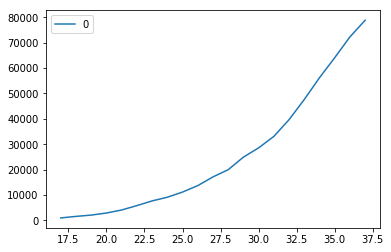

In [5]:
casosTotales = pd.DataFrame(casosTotales)
casosTotales.tail(21).plot()

#### NUEVOS CASOS DIARIOS

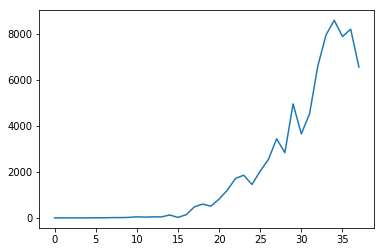

In [6]:
plt.plot(nuevosCasos)
plt.show()

#### HISTÓRICO
###### Últimos 10 días

In [7]:
totalhistorico.tail(10)

Casos Totales  Casos diarios  porcentaje
28          19980           2833   16.521841
29          24926           4946   24.754755
30          28572           3646   14.627297
31          33089           4517   15.809184
32          39673           6584   19.897851
33          47610           7937   20.006049
34          56188           8578   18.017223
35          64059           7871   14.008329
36          72248           8189   12.783528
37          78797           6549    9.064611

## Madrid y Cataluña 

## Casos totales

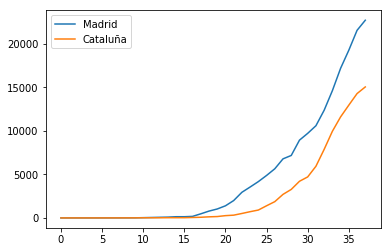

In [8]:
df1 = pd.DataFrame(mdCasos)
df2 = pd.DataFrame(ctCasos)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

## Casos diarios 

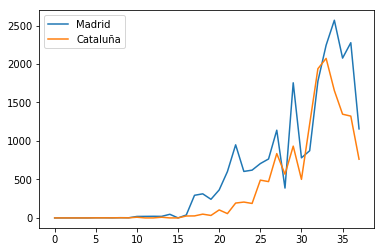

In [9]:
df1 = pd.DataFrame(mdnew)
df2 = pd.DataFrame(ctnew)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

### Historico Madrid y Cataluña
##### Ultimos 10 días

In [10]:
madCat = concatDF(mdhistorico,cthistorico)
madCat.columns= ['Total Madrid', 'Diarios Madrid', '% Madrid','Total Cataluña', 'Diarios Cataluña', '% Cataluña']
madCat.tail(10)

Total Madrid  Diarios Madrid   % Madrid  Total Cataluña  Diarios Cataluña  \
28          7165             388   5.725247            3270               568   
29          8921            1756  24.508025            4203               933   
30          9702             781   8.754624            4704               501   
31         10575             873   8.998145            5925              1221   
32         12352            1777  16.803783            7864              1939   
33         14597            2245  18.175194            9937              2073   
34         17166            2569  17.599507           11592              1655   
35         19243            2077  12.099499           12940              1348   
36         21520            2277  11.832874           14263              1323   
37         22677            1157   5.376394           15026               763   

    % Cataluña  
28   21.021466  
29   28.532110  
30   11.920057  
31   25.956633  
32   32.725738  
33   26.360631  
34   16.654926  
35   11.628709  
36   10.224111  
37    5.349506

# Curvas por CCAA

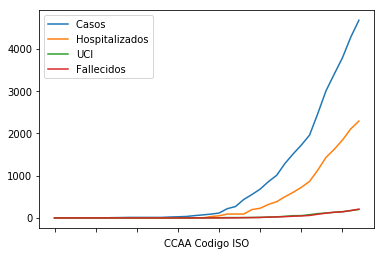

In [11]:
andalucia.plot()

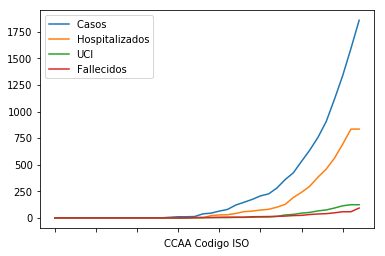

In [12]:
aragon.plot()

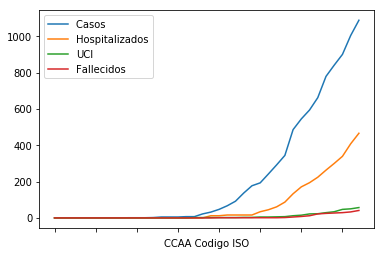

In [13]:
asturias.plot()

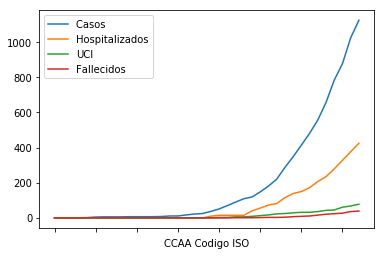

In [14]:
canarias.plot()

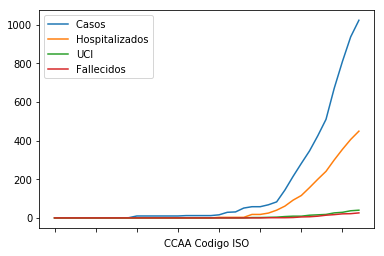

In [15]:
cantabira.plot()

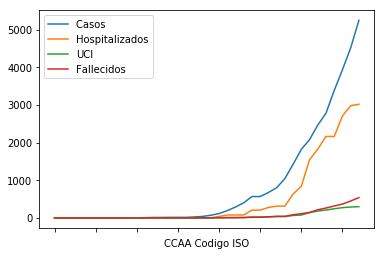

In [16]:
castillaMancha.plot()

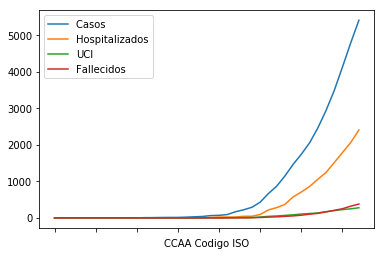

In [17]:
castillaLeon.plot()

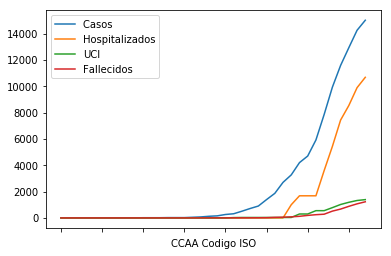

In [18]:
cataluna.plot()

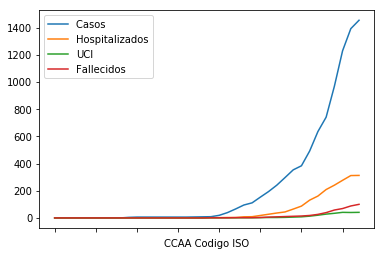

In [19]:
extremadura.plot()

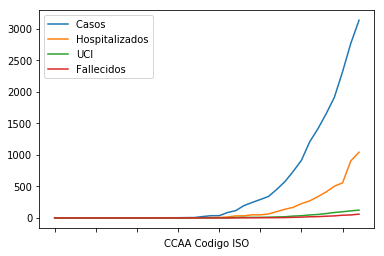

In [20]:
galicia.plot()

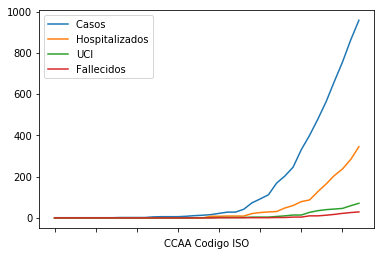

In [21]:
baleares.plot()

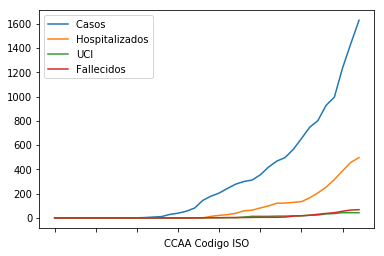

In [22]:
rioja.plot()

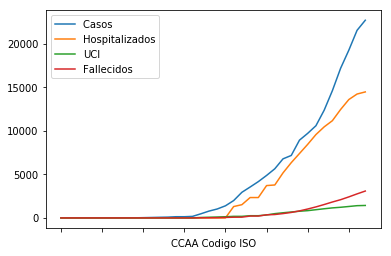

In [23]:
madrid.plot()

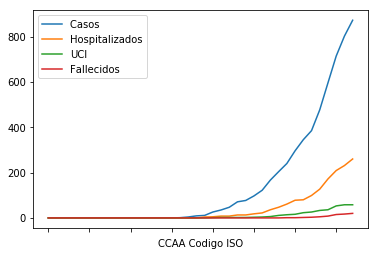

In [24]:
murcia.plot()

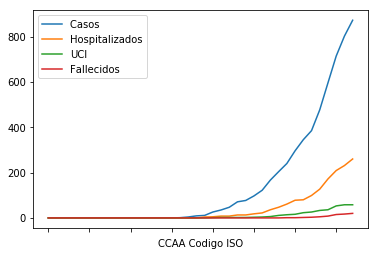

In [25]:
murcia.plot()

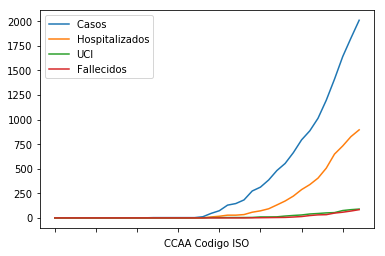

In [26]:
navarra.plot()

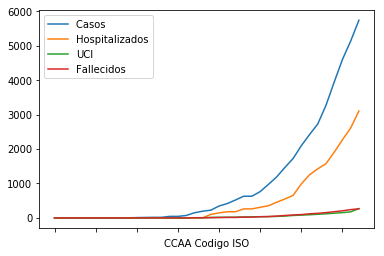

In [27]:
paisVasco.plot()

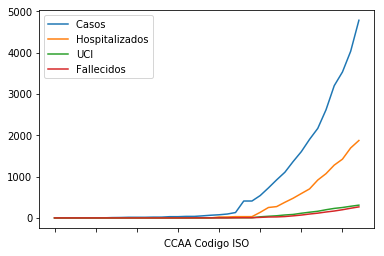

In [28]:
valencia.plot()

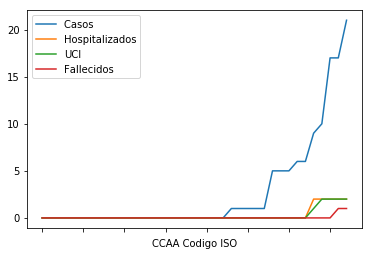

In [29]:
ceuta.plot()

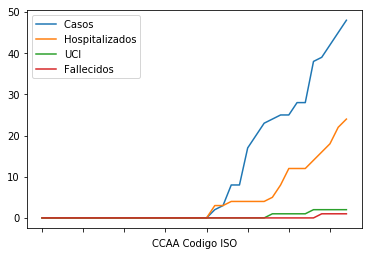

In [30]:
melilla.plot()